# PyTorch and Machine Learning Guide

### Overview
Welcome to the PyTorch Machine Learning Guide! In this notebook, we will dive into
using PyTorch, a popular deep learning framework, to build and train machine learning
models. Whether you are a beginner or looking to refresh your PyTorch knowledge,
this guide will help you get started. 

Machine learning is a branch of artificial intelligence that empowers computers to learn from data and make predictions or decisions without explicit programming. It's like teaching a computer to recognize patterns, relationships, and trends within datasets. This is achieved through a variety of algorithms and statistical models. Machine learning has wide-ranging applications, from recommendation systems that suggest products to you, to medical diagnoses based on patient data, and even self-driving cars that adapt to changing road conditions. The ability to learn from data and make predictions has transformed industries and continues to shape the future of technology.

Deep learning, which this guide will focus on, is a subset of machine learning that focuses on neural networks with multiple layers, known as deep neural networks. These networks are inspired by the structure and function of the human brain. Deep learning algorithms have demonstrated remarkable capabilities in recognizing complex patterns in data. They have revolutionized fields such as computer vision, natural language processing, and speech recognition. Deep learning has enabled breakthroughs in areas like image and speech recognition, language translation, and even playing complex games like Go at a superhuman level. Its ability to automatically learn hierarchical representations from data makes it a powerful tool for solving intricate problems.

Do note that while this notebook will provide a guide on syntax and practical 
implementation for machine learning, this notebook is no substitute for machine
learning classes and will still require some degree of domain knowledge. There are
several multi-semester-long courses devoted to these very topics, with varying
veins of mathematical and conceptual gates. Nevertheless, this guide seeks to 
attempt to simplify the process and provide some level of intutition behind the
syntax. For a primer on neural networks and related technologies, it is highly recommended
to check out additional resources to help you out, such as, but not limtied to
this informative playlist from [3B1B](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&ab_channel=3Blue1Brown).

Before you begin, make sure you have completed the previous steps in the starter kit,
especially setting up your Conda environment. You'll need PyTorch and other dependencies
installed to follow along.

### A Quick Introduction to PyTorch

PyTorch is an open-source machine learning library. It is known for its dynamic computation graph and flexibility, making it a preferred choice for researchers and developers. PyTorch's advantages, such as automatic differentiation, simplified methods, and extensive documentation, make it a powerful tool for deep learning projects. This guide will attempt to cover some of the main ideas, but more information can be found in the documentation [here](https://pytorch.org/docs/stable/index.html).

Note that certain machine learning models are pre-implemented with `scikit-learn` (sklearn). While this would allow simpler model implementations and potentially integrations with some projects, the goal of this starter kit is to provide you with the tools to design your own machine/deep learning models. Nevertheless, more information regarding `scikit-learn` can be found [here](https://scikit-learn.org/stable/tutorial/index.html) if that better suits your interests!

We assume you've set up your Conda environment and installed the relevant PyTorch library. If you haven't, refer back to the [conda tutorial](1-conda.md).

In [4]:
# Environment Sanity Check! Run this to check that your kernel is running as expected.
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Check if CUDA/GPU is available
print("CUDA Available: ",torch.cuda.is_available())

CUDA Available:  False


### Our First Model

The tutorial will go through the steps of the actual implementation of a model in order to illustrate what you can implement and may need to change in your own implementation. The model that we will work through will be an classifier on the MNIST dataset (which consists of images depicts digits form 0-9 and their respective labels), which is to say, **a model that can take in a picture of a digit from 0-9 and returns a prediction of which digit the image represents** with a confidence percentage or probability. More technically, we will be implementing **logistic regression**.

Consider the following cell to help visualize the images, courtesy of ChatGPT:

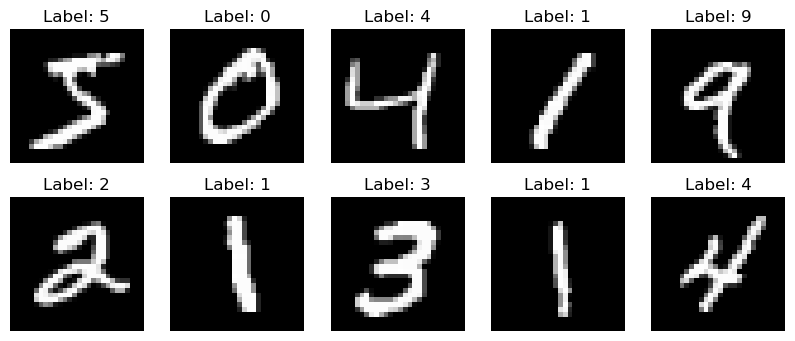

In [5]:
# Load the MNIST dataset
# Remember, if you get an error saying that transforms is not found, you need to run the previous block with the imports!
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Visualize all digits
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(mnist_dataset[i][0].squeeze().numpy(), cmap='gray')
    ax.set_title(f"Label: {mnist_dataset[i][1]}")
    ax.axis('off')

plt.show()

Sequentially, the steps we will go through are:
1) Data Preprocessing
2) Model, Criterion/Loss, and Optimizer Initialization
3) Training the Model
4) Model Evaluation

### 1. Data Preprocessing

Data preprocessing is an important first step in the machine learning pipeline. Since the premise of machine learning is the ability to analyze trends based in data, it is necessary to find a good streamlined process for loading and processing said data. In this section we will go over the PyTorch Tensor data structure and load in the data.

PyTorch Tensors are fundamental data structures in PyTorch, a popular deep learning framework. They are similar to multi-dimensional arrays or matrices and serve as the building blocks for neural networks and other numerical computations. We use PyTorch Tensors instead of nested lists because of a few unique qualities, with the most important one being support for the calculation of gradients necessary in the process of training the model. 

Consider the following example of converting to a Tensor.

In [6]:
a_list = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]     # a 2x3 list

sample_tensor = torch.tensor(a_list)            # convert the list to a PyTorch tensor
print(sample_tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


Now that we know how to convert lists into tensors, we can move directly on to loading in our data. There are many ways to load in data, whether be from parsing a CSV/TSV file, loading in a JSON/XML, etc., though the method that we will use in this guide will just use one of PyTorch's built-in datasets, the MNIST dataset. Note that all samples loaded via this method are PyTorch tensors. If you load data in another way, you may need to convert the data to PyTorch tensors.

In [7]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # tuple of (image, label)

num_images = len(mnist_dataset)                                              # number of images in the dataset
image_size   = mnist_dataset[0][0].shape                                     # size of the first image in the dataset
unique_labels = set([mnist_dataset[i][1] for i in range(num_images)])        # label of the first image in the dataset

# There are 60000 images of size 28x28 pixels in the training set
print(f'Dataset Size: {num_images} || Image Shape: {image_size}')
print(f'Labels: {unique_labels}')

Dataset Size: 60000 || Image Shape: torch.Size([1, 28, 28])
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


When working with machine learning datasets, especially large ones, it's important to efficiently load and process the data for training and evaluation. PyTorch provides a convenient way to handle data loading using DataLoaders. DataLoaders allow you to load and process data in batches, making it easier to work with large datasets and perform tasks like data augmentation and shuffling.

In the previous code, we loaded the MNIST dataset directly into a variable called `mnist_dataset`. While this works for small datasets like MNIST, it might not be the most efficient way to handle larger datasets. To work with larger datasets, we can use PyTorch's DataLoader class. This class provides a way to efficiently load and preprocess data in batches, which is particularly useful for tasks such as training neural networks.

Let's see how to set up a DataLoader to load our MNIST dataset efficiently.

In [8]:
from torch.utils.data import DataLoader, random_split

# Split the dataset into training and testing sets
def test_train_split(train_ratio = 0.8, data = mnist_dataset):
    train_size = int(train_ratio * len(data))
    test_size = len(mnist_dataset) - train_size
    train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])
    return train_dataset, test_dataset
trainData, testData = test_train_split(0.8, mnist_dataset)

# Sanity Check: Print the size of the training and testing sets
print(f'Train Dataset Dimensions: {len(trainData)} x {trainData[0][0].shape}')
print(f'Test Dataset Dimensions: {len(testData)} x {testData[0][0].shape}')

# Create DataLoader instances for training and testing sets. These iterators-like objects
# enable us to iterate over the dataset and fetch a batch of images and labels at each iteration.
batch_size = 64
train_loader = DataLoader(trainData, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testData, batch_size=batch_size, shuffle=False)

Train Dataset Dimensions: 48000 x torch.Size([1, 28, 28])
Test Dataset Dimensions: 12000 x torch.Size([1, 28, 28])


Note here that our inputs are of size 1 x 28 x 28. This denotes that our input is a 28x28 pixel black and white image. The first dimension "1" denotes the number of color channels; with 1 channel, we only have light intensity (hence black and white), but with 3 channels, we can represent more colors (e.g. via channels for red, green, and blue (RGB!)). 

Inputs to your models do not have to be multi-dimensional tensors like a 1x28x28 input. Many inputs to neural networks are often 1D vectors with each value representing some feature of the input data. For instance, consider running a model on classifying foods with a 1D length 3 vector; the first value could represent the sugar level, the second value could represent the sodium level, and the third value could represent the number of eggs used. 

How can we pass a 1D vector in with image data? We can instead flatten inputs to represent them in lower dimensional spaces; for instance, we can represent our 1x28x28 tensor as a singular 1D length 784 vector. You will see later in the next section how to do this with a `Flatten()` layer.

### 2. Model, Criterion/Loss, and Optimizer Initialization

In this section, we'll dive into creating and setting up the components necessary for training a machine learning model. A machine learning model can be divided into three essential components: a representation (model definition), loss (a metric to define how poorly the model is performing), and optimizer (an algorithm to help us tune the model to reduce the aforementioned loss value). We will go through each of these components individiually in order. 

We begin with the model's representation. We start by defining the sample architecture of our machine learning model. In this example, we'll create a simple neural network using PyTorch's `nn.Module` base class. Using the nn.Module allows for us to integrate the loss and optimizer. 

In [9]:
# Our first network. It takes in a single number as input and multiplies it by a learnable parameter!
class SimpleNetwork(nn.Module):
    def __init__(self, multiplier):
        super().__init__()
        # Important! We need to wrap our learnable parameters in nn.Parameter because
        # our optimizer will look for them and update them!
        self.multiplier = nn.Parameter(torch.tensor(float(multiplier)))
    
    def forward(self, x):
        return self.multiplier * x
    
network = SimpleNetwork(5) # We want the network to mutiply inputs by 5

input = 10
output = network(input)
print(f'Our output is {output}!')

Our output is 50.0!


Note that the models that we seek to create will be dynamic and . We will explore more complex model architectures with multiple layers and activation functions. The architecture of a neural network greatly influences its ability to learn complex patterns from the data.

Fully connected layers, also known as linear layers, are one of the fundamental building blocks of neural networks. Each neuron in an full-connected layer is connected to every neuron in the previous and subsequent layers, allowing the network to learn complex relationships in the data.

In mathematical terms, let our input dimension be $k$ and our output dimension be $n$. This can be expressed by multiplying our 1xk input vector (denoted $x$) by a nxk matrix (denoted $A$), where our nx1 output $y = Ax^T$. With linear layers, our goal is to find the optimal weight matrix $A$ that will lead to the best output $y$. 

In [12]:
import torch.nn as nn

# Our second network. It takes in a vector input and outputs a vector after multiplying by a matrix.
class LinearNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        # No need to wrap in nn.Parameter because nn.Linear does it for us!
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
network = LinearNetwork(10, 20, 5) # We take in a 10-dimensional vector and output a 5-dimensional vector

input = torch.randn(10) # Our input is a random 10-dimensional vector
output = network(input) # We multiply the input by a matrix and output a 5-dimensional vector
print(f'Our output is {output}!') # Running this multiple times will give you random outputs!

Our output is tensor([ 0.2370, -0.4568,  0.1987,  0.3810, -0.4424], grad_fn=<ViewBackward0>)!


Note that we've included two linear layers here. This is akin to multiplying the inputs with a first weight matrix $A$ and then multiplying that output with a second matrix $B$ (i.e. $BAx$). If you've taken a linear algebra course or are familiar with the idea of matrix properties, note that we can summarize this transformation with a single matrix $C$, i.e. $Cx$, where $C = BA$. There is no point in optimizing both matrices $B$ and $A$ since we might as well be optimizing matrix $C$ (or rather, why use two linear layers if you can have the same effect with one?). 

Machine learning involves trying to capture relationships in data; the approach with linear layers (i.e. $Cx$) is limited in only being able to capture linear relationships in data. We consequently introduce [_activation functions_](https://www.geeksforgeeks.org/activation-functions-neural-networks/#), transformations that introduce non-linearity to the data. An example of an activation function would be the rectified linear activation function (ReLU) defined as f(x) = max(0, x).

In [13]:
import torch.nn as nn

class NetworkWithReLU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()   # our activation function!
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
## Same structure! But now we have a ReLU activation function!
network = NetworkWithReLU(10, 20, 5) 

input = torch.randn(10) 
output = network(input) 
print(f'Our output is {output}!') # The outputs look similar, but that's because we haven't trained the network yet!

Our output is tensor([-0.4606, -0.3769, -0.1019, -0.3619,  0.5110], grad_fn=<ViewBackward0>)!


Next, we need to define a loss function, also known as a criterion. The loss function is a measurement of how well good your outputs are, where a higher loss value represents a worse output. Consider the loss metric Mean Squared Error (MSE). Loss is defined as the squared difference between the true output and the predicted output, which is then averaged across all samples. A unique trait about MSE emphasizes penalties on large differences between true and predicted outputs. 

The choice of loss function depends on the specific problem you are trying to solve. For example, for a regression problem, you might use Mean Squared Error (MSE), and for a classification problem, Cross-Entropy Loss is commonly used. 

Here's an example of how to define a Mean Squared Error loss function. This works well for tasks like linear regression, but we will instead use Cross-Entropy Loss for our MNIST task. Read more [here](https://www.geeksforgeeks.org/cross-entropy-cost-functions-used-in-classification/#).

In [ ]:
## We define our criterion here.
# We will use Mean Squared Error (MSE) Loss. MSE is defined as:
# MSE = (1/n) * sum((y - y_hat)^2), where y is the true label and y_hat is the
# predicted label for each index in the output vector.

criterion = nn.MSELoss()

Finally, we define our optimizer. Optimizers are methods that improve your model's weights based on the loss function. Weight optimization occurs through a process known as [_backpropogation_](https://www.javatpoint.com/pytorch-backpropagation-process-in-deep-neural-network). In general, optimizers are functions that use the negative gradient of your weights with respect to the loss function (e.g. gradient descent), though the actual math behind it is quite complex. We also must consider a tunable parameter $\alpha$, or the learning rate. This affects how much weight is put onto gradients, and is often kept around the 0.01 to 0.001 range. 

In [ ]:
## We define our optimizer here.
# We can use Stochastic Gradient Descent (SGD). SGD is defined as:
# theta = theta - alpha * gradient, where theta is the learnable parameter,
# alpha is the learning rate, and gradient is the gradient of the loss function
# with respect to theta. On a high level, SGD is an iterative optimization
# algorithm that updates the learnable parameters of the model in order to
# minimize the loss function.

some_model = NetworkWithReLU(10, 20, 5) 

learning_rate = 0.01
optimizer = torch.optim.SGD(some_model.parameters(), lr=learning_rate) ## Remember to pass in the parameters with respect to the network!

Now let's bring everything together. With respect to our task on the MNIST dataset, we
can define a neural network that takes in images, flattens them, then returns an 1D length 
10 vector. We define the highest valued index as the predicted class.

For instance, if [1, 2, 3, 2, 1, 2, 1, 1, 1, 1] is returned as the model's output,
index 2 has the highest value, so we predict that the image represents the number 2.

In [34]:
class MNISTNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.flatten(x) # flatten the image, i.e. from 1x28x28 to 784
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
# We define our model here.
input_size = 28 * 28
hidden_size = 100
output_size = 10
model = MNISTNetwork(input_size, hidden_size, output_size)

# We define our criterion here.
criterion = nn.CrossEntropyLoss()

# We define our optimizer here.
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 3. Training the Model

It's finally time to train our model. In this section, we will cover the training process of our machine learning model. Training is the phase where the model learns from the provided data and improves its performance over time. We'll go through epochs, loss calculation, optimization, and validation during this step. This step is admittedly more syntax than conceptual definitions, but the following code will be annotated for you for reference.

We will start off with a few defintions:
1) Epochs: in the context of training a machine learning model, an "epoch" refers to a single pass through the entire training dataset. During each epoch, the model sees and learns from all the training samples. The purpose of using epochs is to repeatedly expose the model to the data, allowing it to refine its parameters and improve its performance. Training for multiple epochs helps the model converge to a better solution.

2) Batch Sizes: batch size determines how many training examples the model processes at once before updating its parameters. In deep learning, it's computationally efficient to update model weights based on a subset of the training data rather than the entire dataset in one go. A smaller batch size might lead to more frequent updates and faster convergence, while a larger batch size can speed up training but might result in less accurate updates.

3) Optimizer Step: optimizers play a central role in training a machine learning model. After each batch of data, the model calculates the gradient of the loss with respect to its parameters. These gradients represent the direction in which the model should adjust its parameters to reduce the loss. The optimizer's job is to efficiently update the model's parameters using these gradients. Optimizers vary in terms of the learning rate and other hyperparameters that control the update process.

4) Validation/Testing Step: the "validation step" is an essential part of the training process. It involves evaluating the model's performance on a separate dataset that it hasn't seen during training. This dataset, known as the validation/testing set was defined above in Step 1 where we split the dataset into the training and testing set. This serves as an independent measure of how well the model generalizes to new, unseen data. By monitoring the validation/testing performance during training, you can detect issues like overfitting (where the model learns to fit the training data too closely) and make adjustments to improve the model's generalization.

Overall, this is a complicated step. Abundant comments will be provided in this step to explain the process, but for the most part, minorly refactoring this code and using it should be sufficient for most tasks. To further reduce loss, you can rerun the block and/or tune some hyperparameters such as epoch count, hidden layer size, learning rates, batch sizes, number of layers, and more. Make sure not to train too much otherwise the model will overfit.

In [35]:
epochs = 10                 # number of times we iterate over the entire dataset
total_val_losses = []       # list to store the validation losses at each epoch
total_train_accuracies = []  # list to store training accuracies at each epoch
total_val_accuracies = []    # list to store validation accuracies at each epoch

# Training
for epoch in range(epochs):
    # total loss for each epoch         
    total_loss = 0     
    correct_train = 0
    total_train = 0
    # set the model to training mode. this is important because some layers 
    # (such as Dropout, BatchNorm) behave differently in training and testing mode.     
    model.train()                           
    
    # iterate over the training set in batches of 64 images. each iteration
    # returns a batch of 64 images and their labels.
    for (batch_X, batch_y) in train_loader:
        # zero out the gradients from the previous iteration. this is because
        # pytorch accumulates gradients.
        optimizer.zero_grad() 
        # forward pass. we get the outputs from the model using the inputs
        # from the batch. these outputs are probabilities for each class.             
        outputs = model(batch_X)
        # compute the loss between the outputs and the labels in the batch.  
        loss = criterion(outputs, batch_y)
        # backward pass. we compute the gradients of the loss with respect to
        # the learnable parameters of the model. 
        loss.backward()
        # update the learnable parameters of the model using the gradients
        # computed in the backward pass.
        optimizer.step()
        # add the loss of the batch to the total loss of the epoch.
        total_loss += loss.item()
        # calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        total_train += batch_y.size(0)
        correct_train += (predicted == batch_y).sum().item()
    
    train_accuracy = 100 * correct_train / total_train

    # Validation/Testing Step.
    val_loss = 0
    correct_val = 0
    total_val = 0
    # We do not want to update the learnable parameters of the model when
    # we are evaluating the model. therefore, we set the model to evaluation
    # mode. 
    model.eval()

    # We do not want to compute the gradients when we are evaluating the model.
    # therefore, we use torch.no_grad() to disable gradient computation.
    with torch.no_grad():
        for (batch_X, batch_y) in test_loader:
            # forward pass. we get the outputs from the model using the inputs
            # from the batch. these outputs are probabilities for each class.
            val_outputs = model(batch_X)  
            # compute the loss between the outputs and the labels in the batch.
            loss = criterion(val_outputs, batch_y)  
            # add the loss of the batch to the total loss of the epoch.
            val_loss += loss.item()
            # calculate validation accuracy
            _, predicted = torch.max(val_outputs, 1)
            total_val += batch_y.size(0)
            correct_val += (predicted == batch_y).sum().item()
    
    val_accuracy = 100 * correct_val / total_val
    
    # compute the average metrics. we print these metrics for each epoch.
    batch_train_loss = total_loss / len(train_loader)
    batch_val_loss = val_loss / len(test_loader)
    total_val_losses.append(batch_val_loss)
    total_train_accuracies.append(train_accuracy)
    total_val_accuracies.append(val_accuracy)
    
    # loss should go down!
    print(f"Epoch {epoch + 1:2d}: Train Loss: {batch_train_loss:.6f} // Val Loss: {batch_val_loss:.6f} // Train Acc: {train_accuracy:.2f}% // Val Acc: {val_accuracy:.2f}%")


Epoch  1: Train Loss: 1.455045 // Val Loss: 0.749648 // Train Acc: 69.35% // Val Acc: 83.94%
Epoch  2: Train Loss: 0.575593 // Val Loss: 0.482474 // Train Acc: 86.29% // Val Acc: 87.57%
Epoch  3: Train Loss: 0.431850 // Val Loss: 0.407731 // Train Acc: 88.62% // Val Acc: 89.02%
Epoch  4: Train Loss: 0.378244 // Val Loss: 0.372657 // Train Acc: 89.64% // Val Acc: 89.74%
Epoch  5: Train Loss: 0.348485 // Val Loss: 0.349810 // Train Acc: 90.27% // Val Acc: 90.25%
Epoch  6: Train Loss: 0.328145 // Val Loss: 0.334646 // Train Acc: 90.69% // Val Acc: 90.68%
Epoch  7: Train Loss: 0.312278 // Val Loss: 0.321117 // Train Acc: 91.16% // Val Acc: 91.08%
Epoch  8: Train Loss: 0.298970 // Val Loss: 0.310095 // Train Acc: 91.48% // Val Acc: 91.39%
Epoch  9: Train Loss: 0.287827 // Val Loss: 0.300620 // Train Acc: 91.84% // Val Acc: 91.57%
Epoch 10: Train Loss: 0.277619 // Val Loss: 0.292913 // Train Acc: 92.17% // Val Acc: 91.67%


### 4. Model Evaluation

So, now what? We've finished training our machine learning model and we've reduced our loss values. 
But what does that really mean for us, when our original task was to predict class labels based 
on images? 

Let's define a helper method that returns our prediction. Coincidentally, index 0 corresponds to
the digit 0 all the way up to 9. In different cases, we may need to create a dictionary that
maps each index to a class name.

In [36]:
def get_predictions(logits):
    return torch.argmax(logits) # return the index of the class with the highest probability

Finally, let's visualize the results. Run the following code block a few times
and view the output images. 

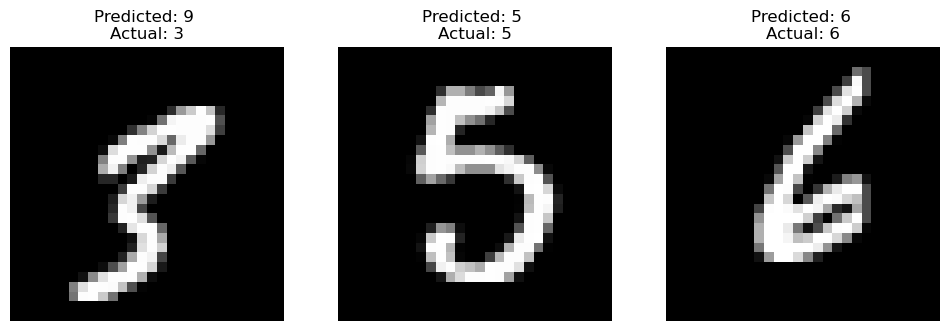

In [37]:
import random

# Set the model to evaluation mode
model.eval()

# Randomly select 3 samples from the test dataset
sample_indices = random.sample(range(len(testData)), 3)

# Create a subplot to display the samples
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, index in enumerate(sample_indices):
    sample, label = testData[index]
    # Make predictions for the sample
    with torch.no_grad():
        output = model(sample.unsqueeze(0))  # Add an extra dimension for batch

    # Get the predicted class by finding the index with the highest probability
    predicted_class = get_predictions(output)

    # Reshape the sample for plotting
    sample = sample.squeeze(0).numpy()

    # Display the sample along with its predicted class
    axs[i].imshow(sample, cmap='gray')
    axs[i].set_title(f'Predicted: {predicted_class} \nActual: {label}')
    axs[i].axis('off')

Note that the predicted values don't always match up with the actual values. The reason why is because the model that we've created is relatively simple. More modern methods use different layer types (e.g. convolutional layers, which are better geared for image classification tasks), different layer counts, different optimizers (e.g. RMSProp, Adam, and other modern gradient-based functions), different epoch counts, and many more. While our training loop achieved an accuracy of roughly 90%, modern methods have achieved a roughly 99.5% accuracy.

That being said, a 90% accuracy is nothing to scoff at. Random guessing would only achieve around an accuracy of 10%. For reference, try re-intializing your model (re-running the final block in Step 2) and running this visualization block, and see how many are classified correctly. With these steps, you've successfully trained your first model! 